In [43]:
from keras import models
from keras import layers
from keras import optimizers
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data setting
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # 가장 자주 나타나는 단어 1만개만 사용

17465344/17464789 [==============================] - 83s 5us/step


In [24]:
# data check
print(train_data[0])
train_labels # 부정 : 0, 긍정 : 1

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [31]:
print(max(np.max(train_data, axis=-1)),max([max(sequence) for sequence in train_data]))

9995 9999


두 개의 값이 왜 다르지???

In [26]:
print(train_data.shape, test_data.shape)

(25000,) (25000,)


In [27]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [32]:
# LIst를 Tensor형태로 바꾸자
def vectorize_sequence(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        result[i,sequence] = 1. # 횟수 추가 없이 등장했냐 안했냐만 중요한건가...
    return result

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [37]:
y_train = train_labels.astype('float32')
y_test = test_labels.astype('float32')

In [40]:
# 16개 유닛을 가진 은닉층 2개로 setting
model = models.Sequential()
model.add(layers.Dense(16, input_shape=(10000,), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # 하나의 값이 0.5 이상인지 이하인지 가지고 판단하기때문에 sigmoid

In [41]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
# 훈련 및 검증 데이터 분리
x_val = x_train[:10000]
x_train = x_train[10000:]

y_val = y_train[:10000]
y_train = y_train[10000:]

In [44]:
hist = model.fit(x=x_train, y=y_train, epochs=20, batch_size=500, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 371us/step - loss: 0.5107 - acc: 0.7793 - val_loss: 0.3788 - val_acc: 0.8735
Epoch 2/20
15000/15000 [==============================] - 4s 288us/step - loss: 0.3004 - acc: 0.9030 - val_loss: 0.3217 - val_acc: 0.8762
Epoch 3/20
15000/15000 [==============================] - 4s 296us/step - loss: 0.2215 - acc: 0.9273 - val_loss: 0.2794 - val_acc: 0.8908
Epoch 4/20
15000/15000 [==============================] - 4s 297us/step - loss: 0.1741 - acc: 0.9435 - val_loss: 0.2938 - val_acc: 0.8827
Epoch 5/20
15000/15000 [==============================] - 5s 301us/step - loss: 0.1384 - acc: 0.9561 - val_loss: 0.2855 - val_acc: 0.8864
Epoch 6/20
15000/15000 [==============================] - 5s 313us/step - loss: 0.1138 - acc: 0.9656 - val_loss: 0.2964 - val_acc: 0.8884
Epoch 7/20
15000/15000 [==============================] - 5s 303us/step - loss: 0.0952 - acc: 0.9709 - val_loss: 0.3149 - 

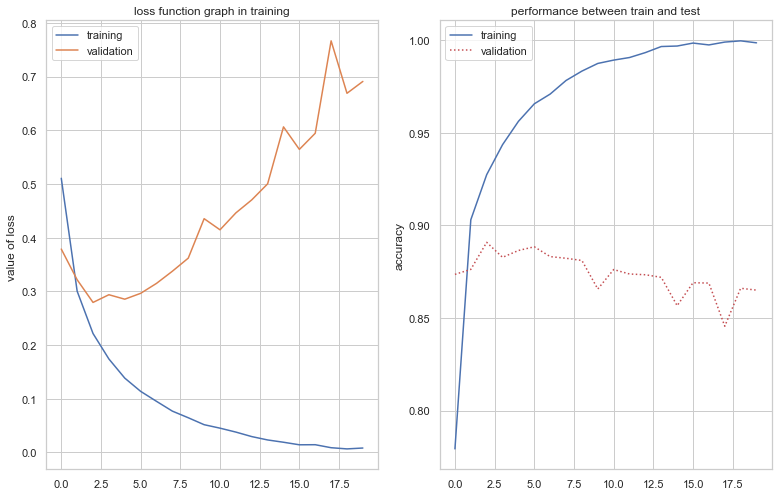

In [49]:
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], label='training')
plt.plot(hist.history['val_loss'], label='validation')
plt.title("loss function graph in training")
plt.ylabel("value of loss ")
plt.legend()
plt.subplot(1,2,2)
plt.title("performance between train and test")
plt.ylabel("accuracy")
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()